# PRML Course Project

Title : Kalman Filter for location estimations

Submitted by :

**Akhil Kumar Donka (EE22MTECH02003)**

**Nitish Kumar (EE22MTECH02005)**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

dataset = r'/content/drive/My Drive/kalman_data2.csv'
df = pd.read_csv(dataset)
df.head()

,timestamp,linear_acceleration.x,linear_acceleration.y,linear_acceleration.z,GPS.lat,GPS.long,GPS.alt
0,1.651580e+12,0.106052,-0.038818,0.006888,17.587824,78.120898,457.098144
1,1.651580e+12,0.000744,0.032263,0.289544,17.587824,78.120898,457.098144
2,1.651580e+12,-0.154423,0.091847,-0.126820,17.587824,78.120898,457.098144
3,1.651580e+12,-0.130696,0.044732,-0.127141,17.587824,78.120898,457.098144
4,1.651580e+12,-0.172285,0.065467,-0.062477,17.587824,78.120898,457.098144


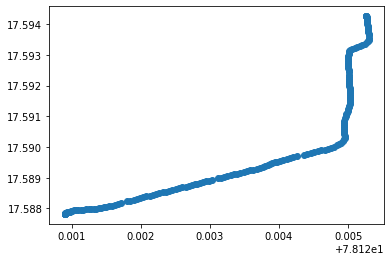

<function matplotlib.pyplot.show>

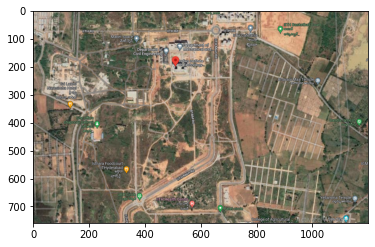

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.scatter(x=df['GPS.long'][::10], y=df['GPS.lat'][::10])
plt.show()

img = mpimg.imread('/content/drive/My Drive/terrain.PNG')
plt.imshow(img)
plt.show

In [ ]:
locations = np.array([df['GPS.long'], df['GPS.lat']]).T

# locations = np.array([[-393.66, -375.93, -351.04, -328.96, -299.35, -273.36, -245.89, -222.58, -198.03, -174.17, -146.32, -123.72, -103.47,	-78.23,	-52.63,	-23.34,	25.96,	49.72,	76.94,	95.38,	119.83,	144.01,	161.84,	180.56,	201.42,	222.62,	239.4,	252.51,	266.26,	271.75,	277.4,	294.12,	301.23,	291.8,	299.89], 
#                      [300.4,	301.78,	295.1,	305.19,	301.06,	302.05,	300,	303.57,	296.33,	297.65,	297.41,	299.61,	299.6,	302.39,	295.04,	300.09,	294.72,	298.61,	294.64,	284.88,	272.82,	264.93,	251.46,	241.27,	222.98,	203.73,	184.1,	166.12,	138.71,	119.71,	100.41,	79.76,	50.62,	32.99,	2.14]]).T

del_t = 0.1

sigma_a = 0.0001
sigma_x = 0.00003
sigma_y = 0.00003

A = np.array([[1, del_t, 0.5*(del_t**2), 0, 0, 0],
              [0, 1, del_t, 0, 0, 0],
              [0, 0, 1, 0, 0, 0],
              [0, 0, 0, 1, del_t, 0.5*(del_t**2)],
              [0, 0, 0, 0, 1, del_t],
              [0, 0, 0, 0, 0, 1]])

Q = np.array([[(del_t**4)/4, (del_t**3)/2, (del_t**2)/2, 0, 0, 0],
              [(del_t**3)/2, (del_t**2), del_t, 0, 0, 0],
              [(del_t**2)/2, del_t, 1, 0, 0, 0],
              [0, 0, 0, (del_t**4)/4, (del_t**3)/2, (del_t**2)/2],
              [0, 0, 0, (del_t**3)/2, (del_t**2), del_t],
              [0, 0, 0, (del_t**2)/2, del_t, 1]])*(sigma_a**2)

R = np.array([[sigma_x**2, 0], 
              [0, sigma_y**2]])

H = np.array([[1, 0, 0, 0, 0, 0],
              [0, 0, 0, 1, 0, 0]])

In [ ]:
class KalmanFilter:
  def __init__(self):
    self.x_posteriori = np.array([0, 0, 0, 0, 0, 0]).T
    self.p_posteriori = np.identity(6)*10
    self.x_apriori = (A @ self.x_posteriori).reshape(-1,1)
    self.p_apriori = A @ self.p_posteriori @ A.T + Q

  def predict(self, z):
    z = z.reshape(-1,1)
    self.kalmanGain = self.p_apriori @ H.T @ np.linalg.inv(H @ self.p_apriori @ H.T + R)
    self.x_posteriori = self.x_apriori + self.kalmanGain @ (z - H @ self.x_apriori)
    self.p_posteriori = (np.identity(6) - self.kalmanGain @ H) @ self.p_apriori @ (np.identity(6) - self.kalmanGain @H ).T + self.kalmanGain @ R @ self.kalmanGain.T
    self.x_apriori = (A @ self.x_posteriori).reshape(-1,1)
    self.p_apriori = A @ self.p_posteriori @ A.T + Q

    return H @ self.x_apriori, self.p_posteriori

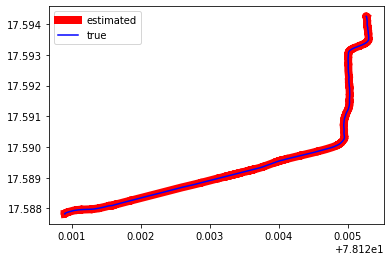

In [ ]:
kalman = KalmanFilter()
kalmanPredictions = []
finalCov = []
initialCov = np.identity(6)*10

for i in range(len(locations)):
  prediction, cov = kalman.predict(locations[i].reshape(-1,1))
  kalmanPredictions.append(prediction)
  finalCov = cov

finalCov = np.array(finalCov)
kalmanPredictions = np.array(kalmanPredictions)

kalmanPredictions = kalmanPredictions[2:, :]

# plt.scatter(kalmanPredictions[:,0], kalmanPredictions[:,1], color='r', s=8)
# plt.scatter(locations[:,0], locations[:,1], color='b', s=5)

plt.plot(kalmanPredictions[:,0], kalmanPredictions[:,1], color='r', linewidth=8, label='estimated')
plt.plot(locations[:,0], locations[:,1], color='b', label='true')
plt.legend()
plt.show()

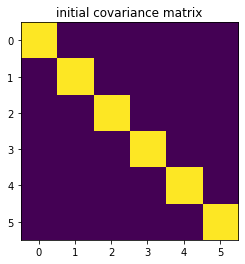

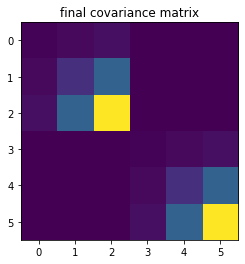

In [ ]:
## printing covariance matrices

plt.imshow(initialCov, interpolation='nearest')
plt.title('initial covariance matrix')
plt.show()

plt.imshow(finalCov, interpolation='nearest')
plt.title('final covariance matrix')
plt.show()

In [ ]:
## With Accelerometer Input in constant acceleration dynamics

accelerations = np.array([df['linear_acceleration.x'], df['linear_acceleration.y']]).T

del_t = 0.1

sigma_a = 0.1
sigma_x = 0.00003
sigma_y = 0.00003

A = np.array([[1, del_t, 0, 0],
              [0, 1, 0, 0],
              [0, 0, 1, del_t],
              [0, 0, 0, 1]])

B = np.array([[0.5*(del_t**2), 0],
              [del_t, 0],
              [0, 0.5*(del_t**2)],
              [0, del_t]])

Q = np.array([[(del_t**4)/4, (del_t**3)/2, 0, 0],
              [0, (del_t**2), 0, 0],
              [0, 0, (del_t**4)/4, (del_t**3)/2],
              [0, 0, 0, (del_t**2)]])*(sigma_a**2)

R = np.array([[sigma_x**2, 0], 
              [0, sigma_y**2]])

H = np.array([[1, 0, 0, 0],
              [0, 0, 1, 0]])

class KalmanFilter:
  def __init__(self):
    self.x_posteriori = np.array([0, 0, 0, 0]).T
    self.p_posteriori = np.identity(4)*10
    self.x_apriori = (A @ self.x_posteriori).reshape(-1,1)
    self.p_apriori = A @ self.p_posteriori @ A.T + Q

  def predict(self, z, u):
    z = z.reshape(-1,1)
    self.kalmanGain = self.p_apriori @ H.T @ np.linalg.inv(H @ self.p_apriori @ H.T + R)
    self.x_posteriori = self.x_apriori + self.kalmanGain @ (z - H @ self.x_apriori)
    self.p_posteriori = (np.identity(4) - self.kalmanGain @ H) @ self.p_apriori @ (np.identity(4) - self.kalmanGain @H ).T + self.kalmanGain @ R @ self.kalmanGain.T
    self.x_apriori = (A @ self.x_posteriori).reshape(-1,1) + (B @ u).reshape(-1,1)
    self.p_apriori = A @ self.p_posteriori @ A.T + Q

    return self.kalmanGain, H @ self.x_apriori

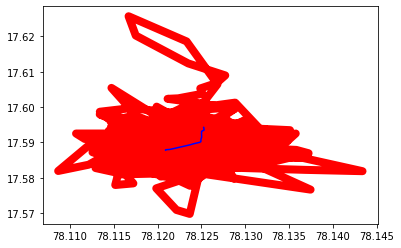

In [ ]:
kalman = KalmanFilter()
kalmanPredictions = []
gains = []

for i in range(len(locations)):
  gain, prediction = kalman.predict(locations[i].reshape(-1,1), accelerations[i].reshape(-1, 1))
  kalmanPredictions.append(prediction)
  gains.append(gain)

kalmanPredictions = np.array(kalmanPredictions)
gains = np.array(gains)

kalmanPredictions = kalmanPredictions[2:, :]

# plt.scatter(kalmanPredictions[:,0], kalmanPredictions[:,1], color='r', s=8)
# plt.scatter(locations[:,0], locations[:,1], color='b', s=5)

plt.plot(kalmanPredictions[:,0], kalmanPredictions[:,1], color='r', linewidth=8)
plt.plot(locations[:,0], locations[:,1], color='b')
plt.show()